In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torchvision
import numpy as np
from torchvision import transforms
from PIL import Image

In [4]:
list_path = ['./Pic1.png','./Pic2.png','./Pic3.png','./Pic4.png']
num_images = len(list_path)
num_columns = (num_images + 1) // 2  # Ceiling division for columns
image = Image.open(list_path[3])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))

image = Image.open(list_path[0])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))
num_rows = 1
num_columns = 4

Width: 1400, Height: 1729
<class 'PIL.PngImagePlugin.PngImageFile'>
Width: 1450, Height: 1753
<class 'PIL.PngImagePlugin.PngImageFile'>


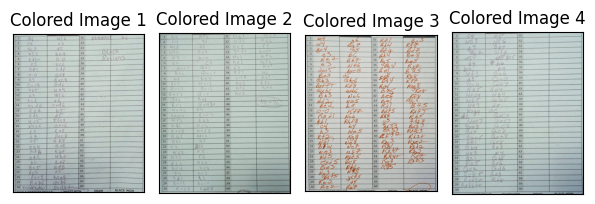

In [12]:
new_width, new_height = 1000,1200
plt.figure(figsize=(6,6))
for i in range(num_images):
    image = cv2.imread(list_path[i])
    # resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image, cmap='gray',)
    plt.title(f'Colored Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

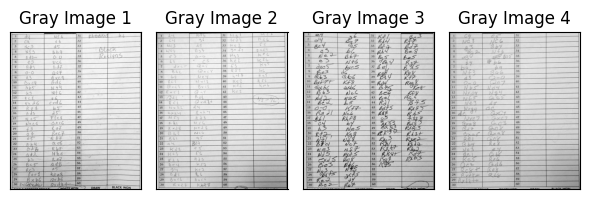

In [16]:
gray_img_list = []
for i in range(len(list_path)):
    image = cv2.imread(list_path[i])
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    image_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray_img_list.append(image_gray)

plt.figure(figsize=(6,6))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

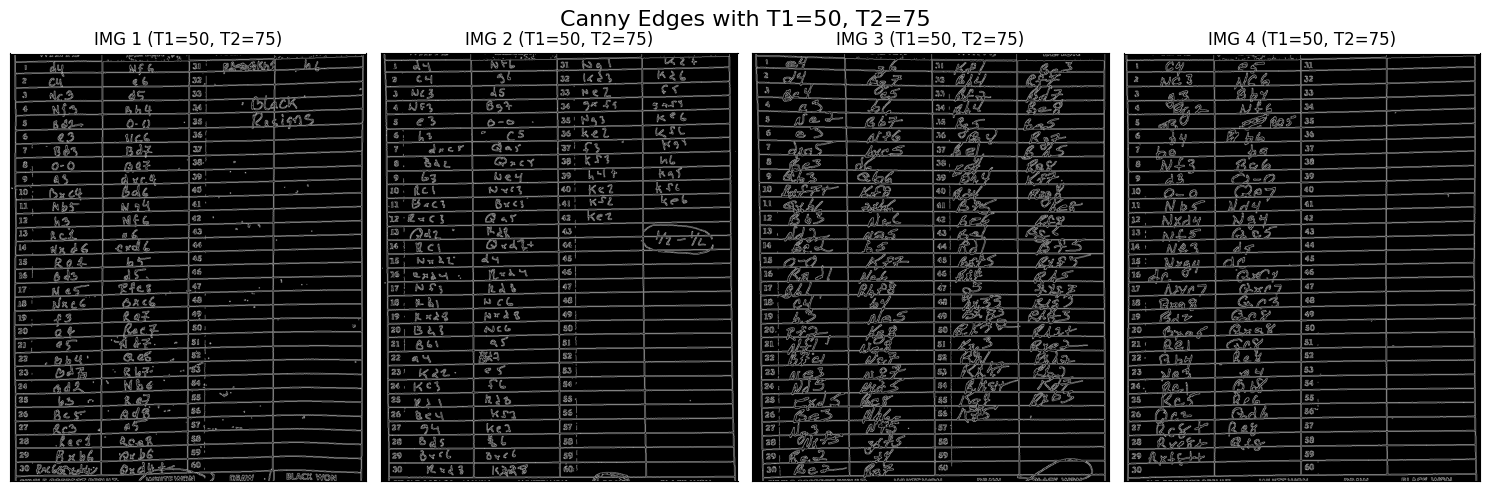

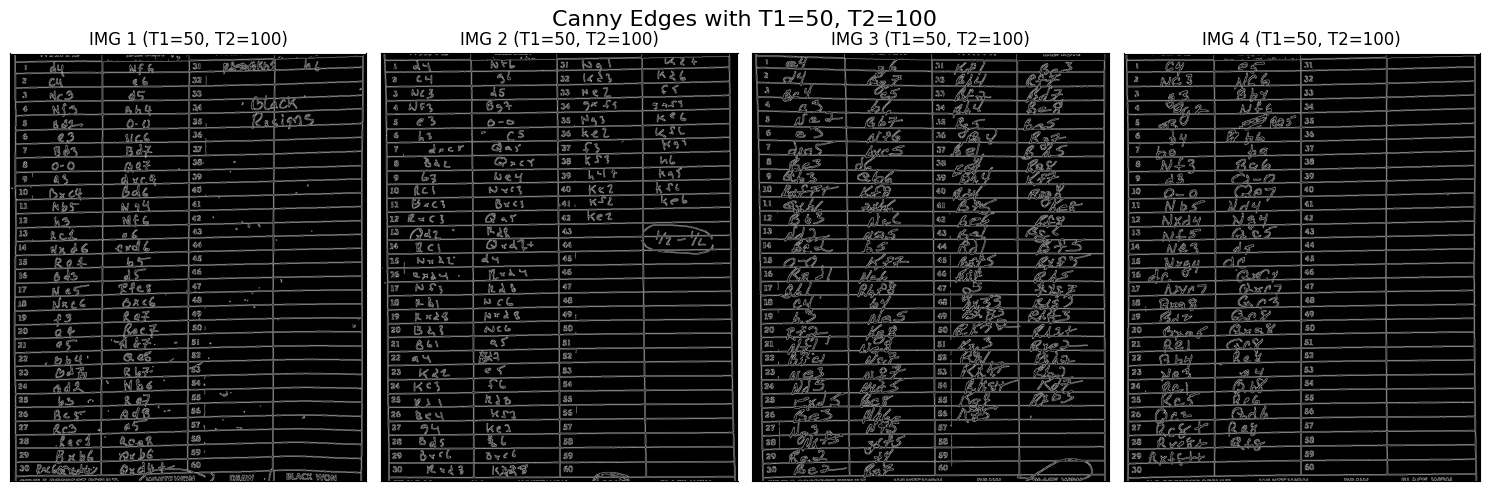

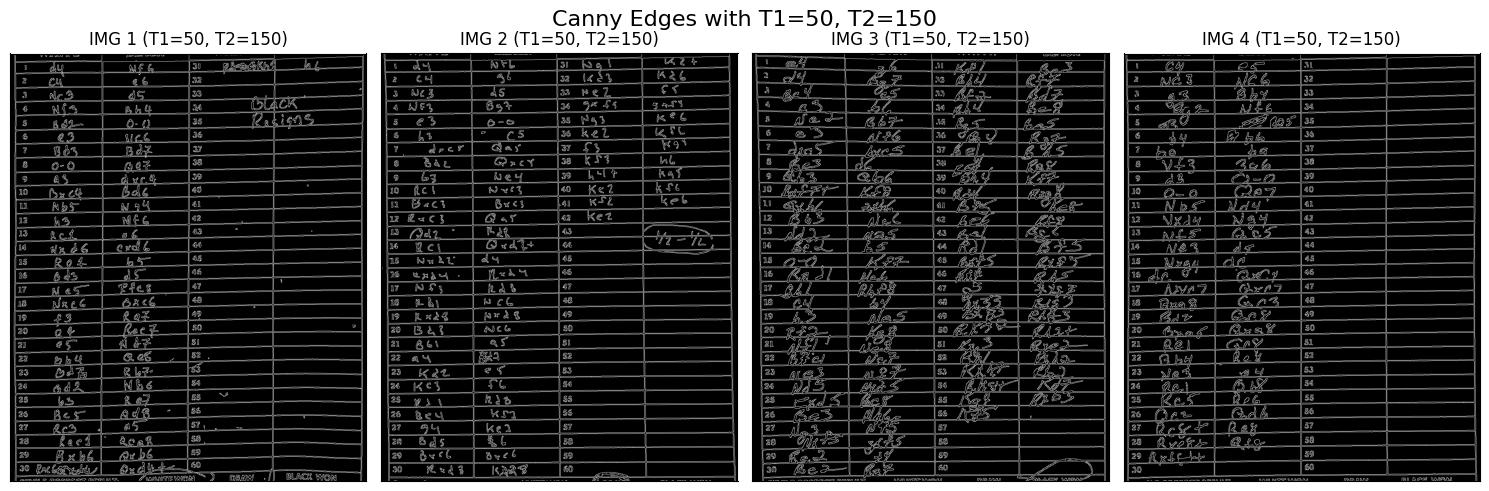

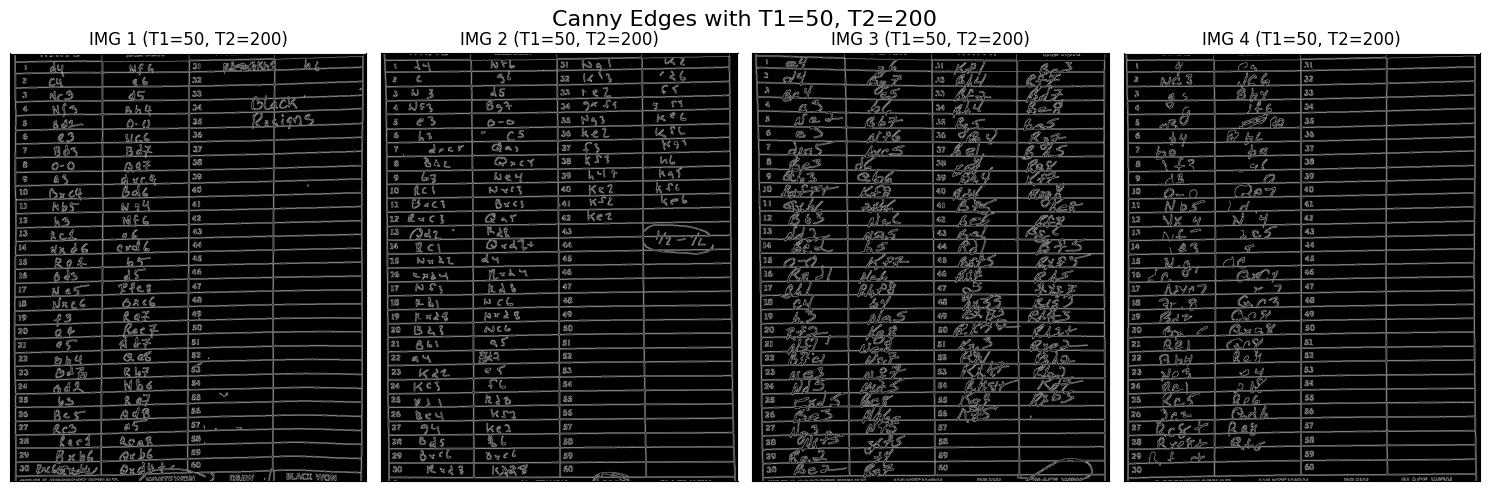

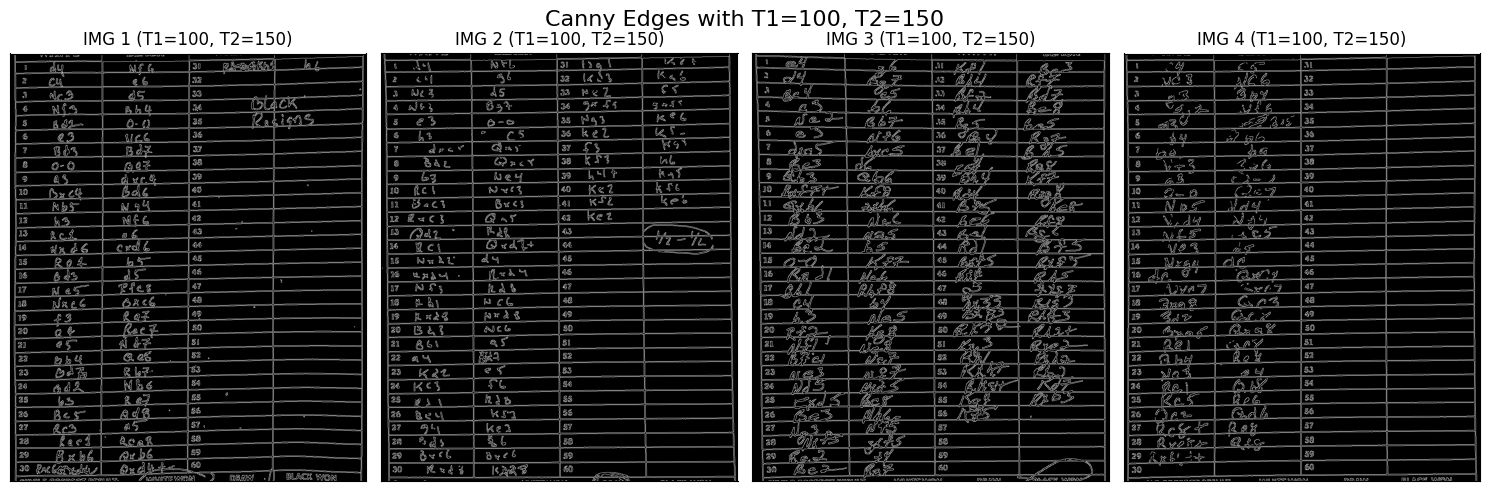

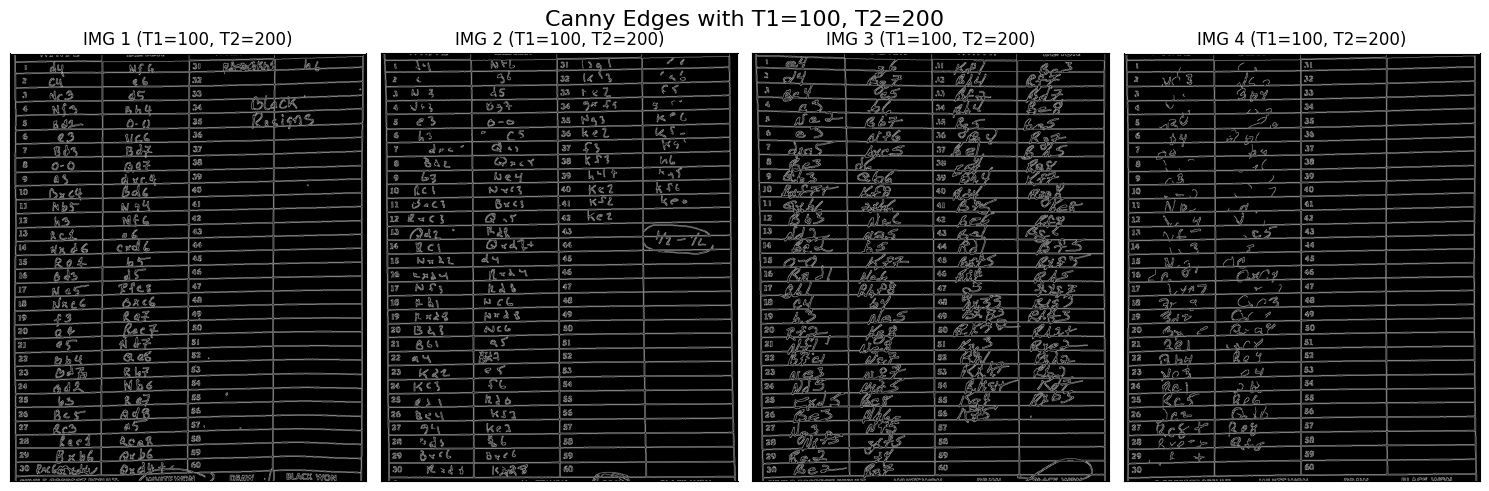

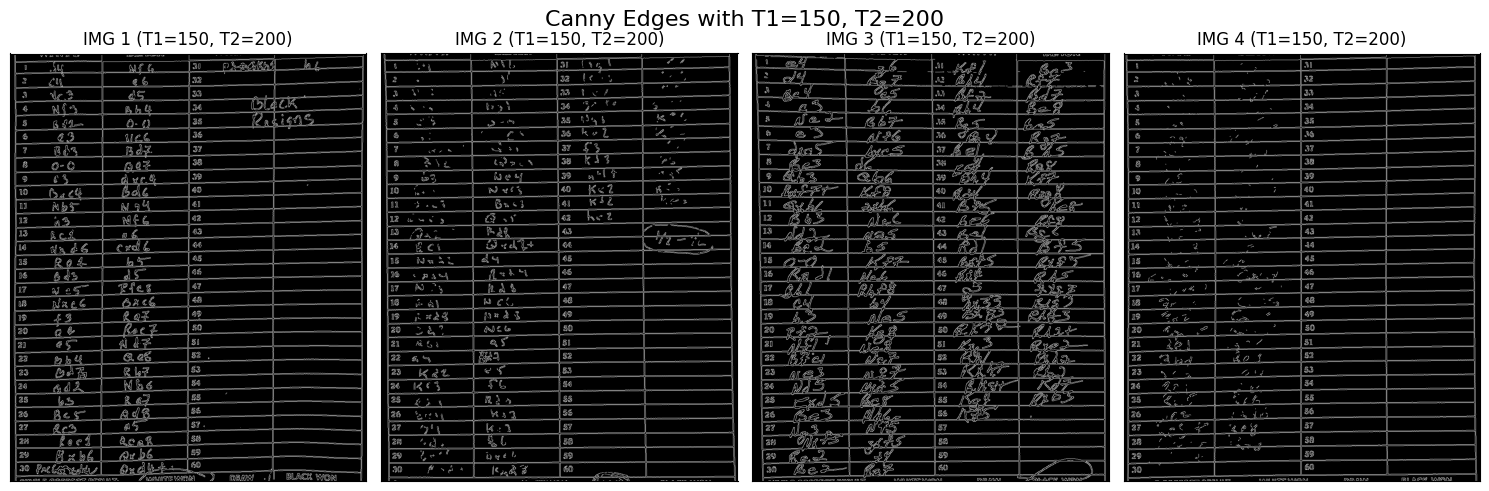

In [17]:
edges_images = []
plt.figure(figsize=(15, 15))

threshold_pairs = [(50, 100), (50, 150), (50, 200), (100, 150),
                   (100, 200), (150, 200)]

for j, (thresh1, thresh2) in enumerate(threshold_pairs):
    plt.figure(figsize=(15, 5)) 
    for i in range(num_images):
        edges = cv2.Canny(gray_img_list[i], threshold1=thresh1, threshold2=thresh2)
        edges_images.append(edges)

        plt.subplot(1, num_images, i + 1) 
        plt.imshow(edges, cmap='gray')
        plt.title(f'IMG {i + 1} (T1={thresh1}, T2={thresh2})')
        plt.xticks([]), plt.yticks([])

    plt.suptitle(f'Canny Edges with T1={thresh1}, T2={thresh2}', fontsize=16)
    plt.tight_layout()
    plt.show()